# Import Necessary Libraries

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read in the data

In [139]:
originalData = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
originalData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


# Check data types

In [140]:
originalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Conclusion

All columns are numeric types. As we have no strings / objects we don't need to worry about non numeric entries

# Statistical Summary

In [141]:
originalData.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2500.50,45.34,20.10,73.77,93152.50,2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,1443.52,11.46,11.47,46.03,2121.85,1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,9307.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1250.75,35.00,10.00,39.00,91911.00,1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2500.50,45.00,20.00,64.00,93437.00,2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,3750.25,55.00,30.00,98.00,94608.00,3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,5000.00,67.00,43.00,224.00,96651.00,4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


All column counts are the same, so we appear to have no missing data.

### Causes for concern

Minimum Experience is -3. How is negative time possible?

# Shape

In [142]:
originalData.shape

(5000, 14)

5000 rows , 14 columns

# Check for missing Data.

In [143]:
originalData.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [144]:
originalData.isna().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

No data appears to be missing. This is consistent with the statistical summary

# Incorrect Impuation

We know from above that all columns are numeric types. We also know that all columns must be non-negative

Check for negative numbers.

In [145]:
originalData[originalData.values < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,4412,23,-2,75,90291,2,1.80,2,0,0,0,0,1,1
4481,4482,25,-2,35,95045,4,1.00,3,0,0,0,0,1,0
4514,4515,24,-3,41,91768,4,1.00,3,0,0,0,0,1,0
4582,4583,25,-1,69,92691,3,0.30,3,0,0,0,0,1,0


The column "Experience" contains negative values

In [146]:
originalData[originalData["Experience"].values < 0].count()

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

We have 52 customers that have a negative number of "Years of Experience" this appear to be incorrect inputation.

Check other columns values are within correct ranges

In [147]:
originalData[~originalData["Education"].isin([1,2,3])]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


All values in the Education column have have valid values of 1,2 or 3

# Exploratory Data Analysis

## Univariate Analysis

Look at each column in turn.

## ID Column

This identity column can be ignored for the purposes of EDA. This has no useful data.

## Age Column

In [150]:
originalData["Age"].describe()

count   5000.00
mean      45.34
std       11.46
min       23.00
25%       35.00
50%       45.00
75%       55.00
max       67.00
Name: Age, dtype: float64

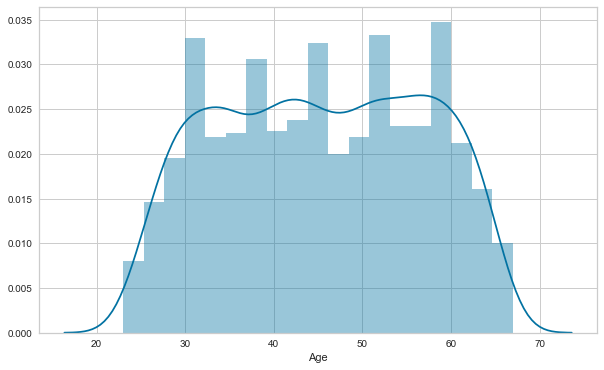

In [151]:
plt.figure(figsize=(10,6))
sns.distplot(originalData["Age"])

The above histogram of ages is multi-modal. 

In [152]:
originalData["Age"].nunique()

45

The age column has 45 unique values. These are

In [153]:
uniques = originalData["Age"].unique()
uniques.sort()
uniques

array([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67], dtype=int64)

The ages above look sensible, no children and no extremely old people

## Experience Column

We know from the Incorrect Imputation section above that 52 entries of the Experience column have got negative values.

These values will need to be repaced before building the final model. The approach will be "mode replacement"

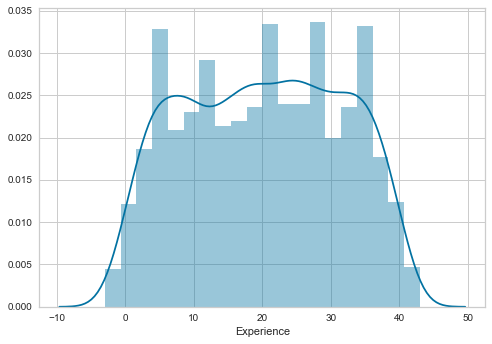

In [154]:
sns.distplot(originalData["Experience"])

Count of frequeny of "experience"

In [156]:
originalData["Experience"].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
      ... 
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, Length: 47, dtype: int64

In [157]:
originalData["Experience"].nunique()

47

Experience column has 47 unique values. Find the negative Experience values.

## Income Column

In [158]:
originalData["Income"].describe()

count   5000.00
mean      73.77
std       46.03
min        8.00
25%       39.00
50%       64.00
75%       98.00
max      224.00
Name: Income, dtype: float64

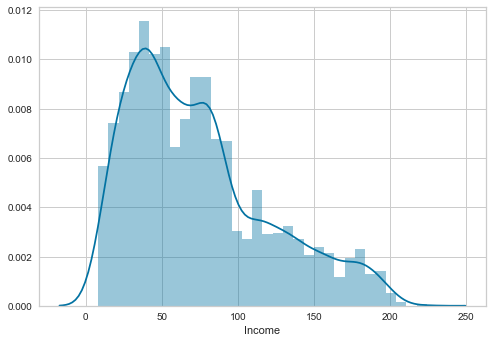

In [159]:
sns.distplot(originalData["Income"])

In [160]:
uniques = originalData["Income"].unique()
uniques.sort()
uniques

array([  8,   9,  10,  11,  12,  13,  14,  15,  18,  19,  20,  21,  22,
        23,  24,  25,  28,  29,  30,  31,  32,  33,  34,  35,  38,  39,
        40,  41,  42,  43,  44,  45,  48,  49,  50,  51,  52,  53,  54,
        55,  58,  59,  60,  61,  62,  63,  64,  65,  68,  69,  70,  71,
        72,  73,  74,  75,  78,  79,  80,  81,  82,  83,  84,  85,  88,
        89,  90,  91,  92,  93,  94,  95,  98,  99, 100, 101, 102, 103,
       104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120,
       121, 122, 123, 124, 125, 128, 129, 130, 131, 132, 133, 134, 135,
       138, 139, 140, 141, 142, 143, 144, 145, 148, 149, 150, 151, 152,
       153, 154, 155, 158, 159, 160, 161, 162, 163, 164, 165, 168, 169,
       170, 171, 172, 173, 174, 175, 178, 179, 180, 181, 182, 183, 184,
       185, 188, 189, 190, 191, 192, 193, 194, 195, 198, 199, 200, 201,
       202, 203, 204, 205, 218, 224], dtype=int64)

In [161]:
originalData["Income"].nunique()

162

The Income Data only has 162 unique values.

## Zip Code Column

This is a categorical variable and it is likely to have a great many number of values

In [162]:
originalData["ZIP Code"].nunique()

467

The data contains 467 unique zip codes.

This means that using "One Hot Encoding" on zip codes would lead to 467 dummy variables. This is probably too many for an initial regression model.

How many customers in each ZIP Code?

In [167]:
originalData["ZIP Code"].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
91711     52
94025     52
92093     51
90245     50
90024     50
90089     46
91330     46
92121     45
94304     45
94143     37
95051     34
94608     34
92182     32
92028     32
92521     32
95054     31
95814     30
95014     29
94542     27
94301     27
94550     27
93407     26
95064     26
95819     26
94501     26
95039     26
94105     25
94303     25
95060     25
94022     25
91107     25
94596     24
93117     24
93555     23
94080     23
95521     23
92717     22
91380     22
92612     22
94110     21
92647     21
91768     21
90034     20
90401     20
94117     20
94132     20
95747     19
92697     19
90025     19
94005     19
92122     19
90266     19
93940     18
94709     18
90840     18
92130     18
94122     18
94309     18
90291     18
92120     17
94583     17
92691     17
93023     17
92009     17
90630     17
92407     17
91311     17
90740     17
92096     17

## Family Column

This column is categorical.

In [168]:
originalData["Family"].nunique()

4

In [169]:
originalData["Family"].unique()

array([4, 3, 1, 2], dtype=int64)

The family column contains 4 unique values of 1,2,3 and 4

Visualise the data.

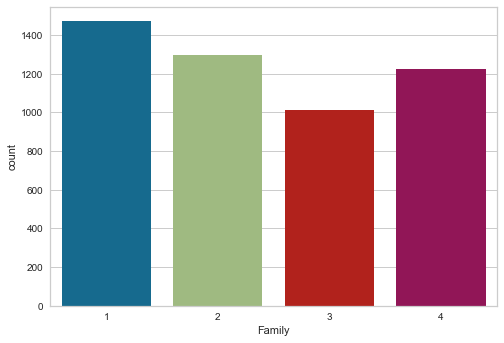

In [170]:
sns.countplot(originalData["Family"])

Find the counts for each of the values of family size.

In [171]:
originalData["Family"].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

## CCAvg Column

In [172]:
originalData["CCAvg"].describe()

count   5000.00
mean       1.94
std        1.75
min        0.00
25%        0.70
50%        1.50
75%        2.50
max       10.00
Name: CCAvg, dtype: float64

In [173]:
originalData["CCAvg"].nunique()

108

108 distinct values exist for the CCAvg.

Visualise the data

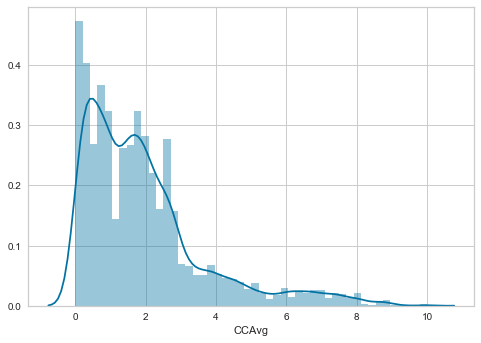

In [174]:
sns.distplot(originalData["CCAvg"])

The distrubution shows lower credit card payments per month are more common than large credit card payments

#### How many people have no Credit Card payment to make?

In [175]:
originalData[originalData["CCAvg"] == 0]["ID"].count()

106

106 people habve no credit card payments

## Education Column

This is categorical data

In [176]:
originalData["Education"].nunique()

3

In [177]:
originalData["Education"].unique()

array([1, 2, 3], dtype=int64)

In [178]:
originalData[~originalData["Education"].isin([1,2,3])]["ID"].count()

0

The only valid values for Education are 1,2,3. All customers have valid values of 1,2,3.

How many customers fall into each category?

In [179]:
originalData["Education"].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

As we can see from the above we have:

* 2096 Undergraduate 
* 1403 Graduates 
* 1501 Advanced/Professional

## Mortgage Column

In [180]:
originalData["Mortgage"].describe()

count   5000.00
mean      56.50
std      101.71
min        0.00
25%        0.00
50%        0.00
75%      101.00
max      635.00
Name: Mortgage, dtype: float64

In [181]:
originalData["Mortgage"].nunique()

347

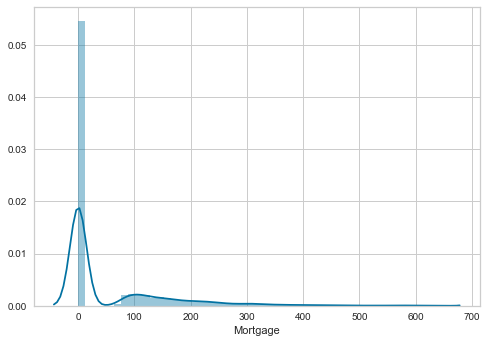

In [182]:
sns.distplot(originalData["Mortgage"])

In [183]:
originalData[originalData["Mortgage"] == 0]["ID"].count()

3462

In [184]:
originalData[originalData["Mortgage"] != 0]["ID"].count()

1538

The aboves establishes that:
 
 * 3462 customers have no mortgage
 * A total of 347 unique values exist for Mortgage

## Personal Loan Column

This is categorical data

In [185]:
originalData.groupby("Personal Loan")["ID"].count()

Personal Loan
0    4520
1     480
Name: ID, dtype: int64

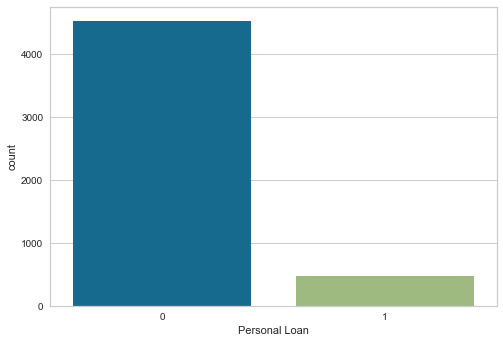

In [186]:
sns.countplot(originalData["Personal Loan"])

In [187]:
originalData["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

The above establishes that:

* 480 people took loans

This is a 9.6% success rate in the previous campaign. (The original question says 9% sucess rate  hence I was expecting 450 not 480)

## SecuritiesAccount Column

This is a categorical varaiable.

In [188]:
originalData["Securities Account"].nunique()

2

In [189]:
originalData["Securities Account"].unique()

array([1, 0], dtype=int64)

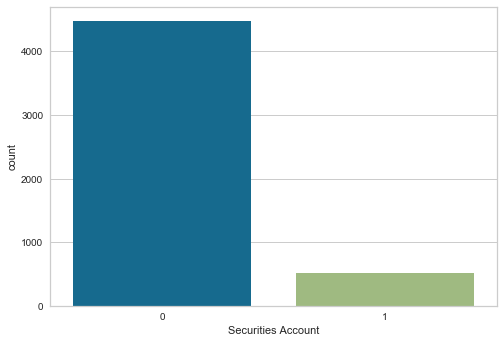

In [190]:
sns.countplot(originalData["Securities Account"])

In [191]:
originalData["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

The above establishes that:

* 522 customers do have a securities account
* 4478 customers do not have a security account

## CD Account Column

This is a categorical column

In [192]:
originalData["CD Account"].nunique()

2

In [193]:
originalData["CD Account"].unique()

array([0, 1], dtype=int64)

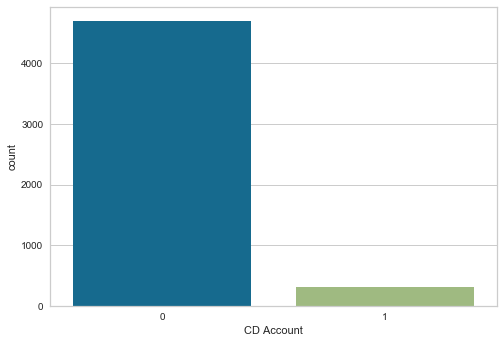

In [194]:
sns.countplot(originalData["CD Account"])

In [195]:
originalData["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

The above establishes that:

* 302 customers have CD accounts
* 4698 customers do not have CD accounts

## Online column

This is  categorical column

In [196]:
originalData["Online"].nunique()

2

In [197]:
originalData["Online"].unique()

array([0, 1], dtype=int64)

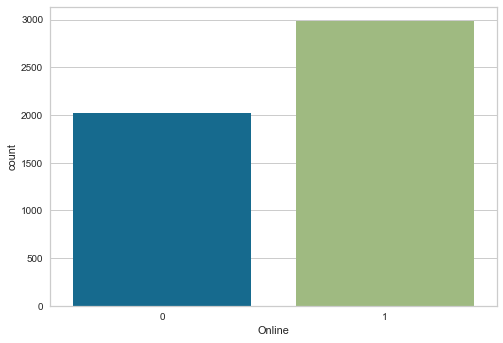

In [198]:
sns.countplot(originalData["Online"])

In [199]:
originalData["Online"].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

The above shows that:

* 2016 customer do not have an online account
* 2984 customers do have an online account

## Credit Card Column

This is a categorical column

In [200]:
originalData["CreditCard"].nunique()

2

In [201]:
originalData["CreditCard"].unique()

array([0, 1], dtype=int64)

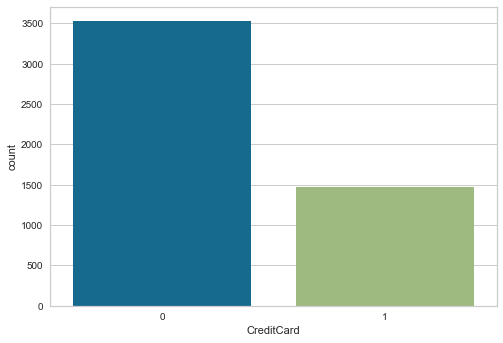

In [202]:
sns.countplot(originalData["CreditCard"])

In [203]:
originalData["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

The above shows that:

* 1470 customers do have a credit card
* 3530 customers do not have a credit card


## Bivariate Analysis


### Correlation

Look for correlations between variables

In [204]:
originalData.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.00,-0.01,-0.01,-0.02,0.01,-0.02,-0.02,0.02,-0.01,-0.02,-0.02,-0.01,-0.00,0.02
Age,-0.01,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,-0.01,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.02,-0.06,-0.05,1.00,-0.02,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP Code,0.01,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,0.02,0.01
Family,-0.02,-0.05,-0.05,-0.16,0.01,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.02,-0.05,-0.05,0.65,-0.00,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.02,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.02,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00


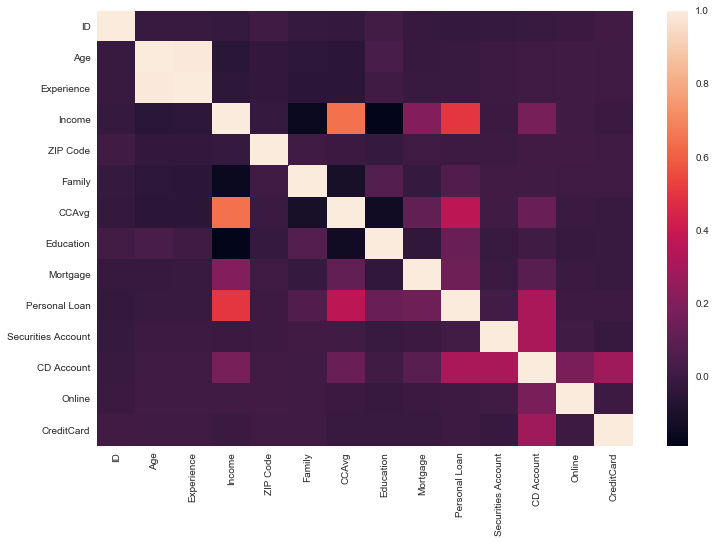

In [205]:
plt.figure(figsize=(12,8))
sns.heatmap(originalData.corr())

The above shows us that taking a loan was most highly correlated with Income, Credit Card Payments and having a CD Account.

However "Income" and "Credit Card Payments are correlated with each other. This suggests that the presence of both of these in a regression model may make the model less accurate and one may need to be dropped at another stage.

### Varaibles  vs Personal Loan Taking

### Age vs Loan taking

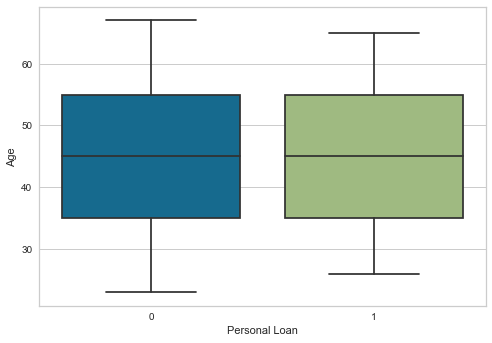

In [206]:
sns.boxplot(originalData['Personal Loan'], originalData['Age']);

Age does not appear to have much effect upon getting a loan.

### Experience vs Loan Taking

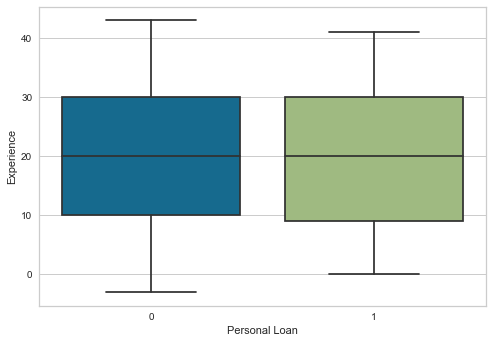

In [207]:
sns.boxplot(originalData['Personal Loan'], originalData['Experience'])

Experience does not appear to have much effect upon loan taking. 

### Income vs loan taking

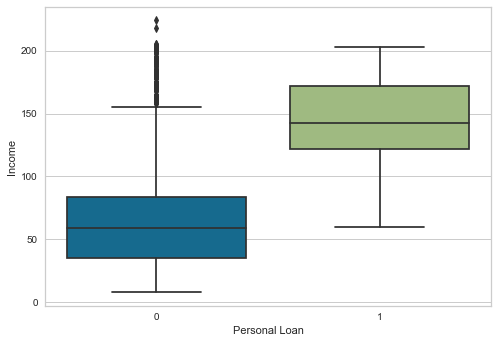

In [208]:
sns.boxplot(originalData['Personal Loan'], originalData['Income'])

Income appears to have an effect upon loan taking. The lower quartile of incomes from those who took loans is about the same as the mean of those who didn't.


#### Zip Code vs Loans

Is loan taking related to ZIP codes?

In [211]:
pd.set_option('display.max_rows', 50)
pd.crosstab(originalData["ZIP Code"], originalData["Personal Loan"])

Personal Loan,0,1
ZIP Code,,
9307,1,0
90005,5,0
90007,6,0
90009,8,0
90011,3,0
...,...,...
96091,4,0
96094,2,0
96145,1,0


Some zip codes seem to have better results than others. We can see zip code 90034 has 19 customers but only one loan. However, 91355 has 8 customers and had 4 loans.

Some form of relation may exist between ZIP Codes and Loan taking

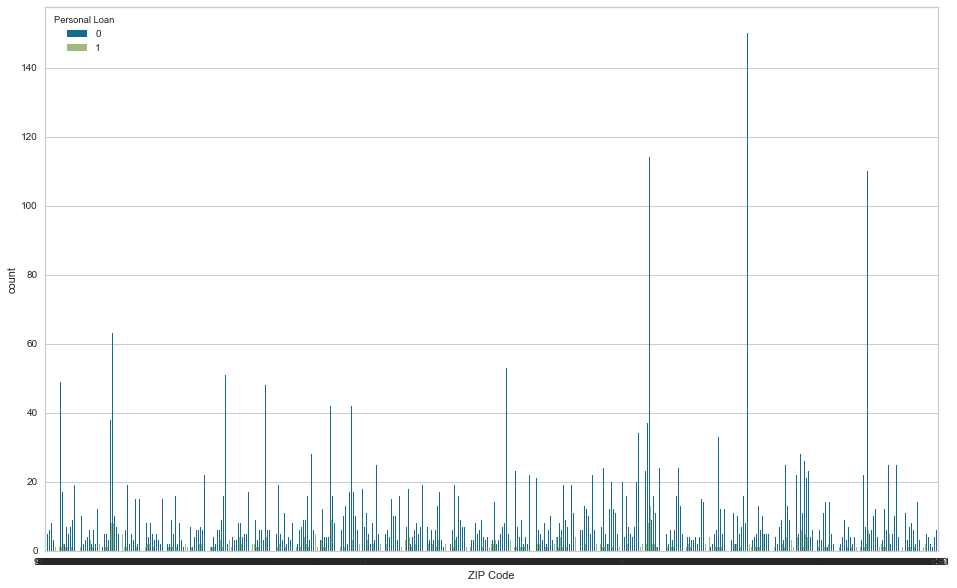

In [212]:
plt.figure(figsize=(16,10))
sns.countplot(originalData['ZIP Code'], hue=originalData['Personal Loan']);

### Family vs Loan Taking

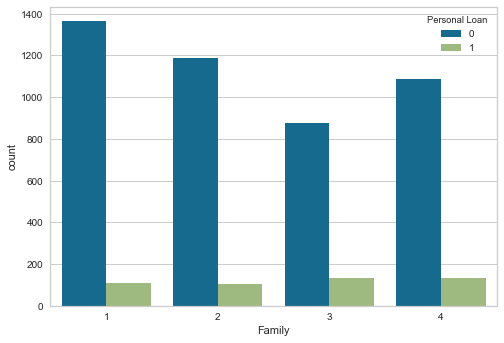

In [213]:
sns.countplot(originalData['Family'], hue=originalData['Personal Loan']);

In [214]:
pd.crosstab(originalData["Family"], originalData["Personal Loan"],  normalize='index')

Personal Loan,0,1
Family,,
1,0.93,0.07
2,0.92,0.08
3,0.87,0.13
4,0.89,0.11


Loan taking doesn't appear to vary much with family size 

### CCAvg vs Loan Taking

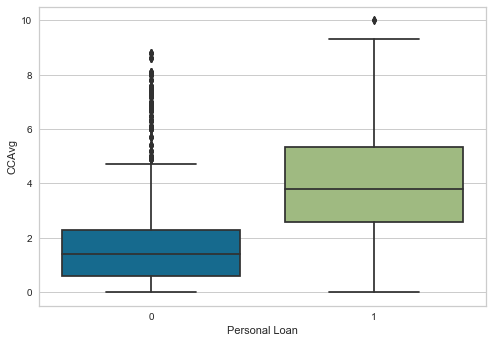

In [215]:
sns.boxplot(originalData['Personal Loan'], originalData['CCAvg']);

Customers who take loans appear to have higher average credit card payments than those who don't. The 50 percentile of those who take loans is above the 75% of those who don't.

### Education vs Personal Loan

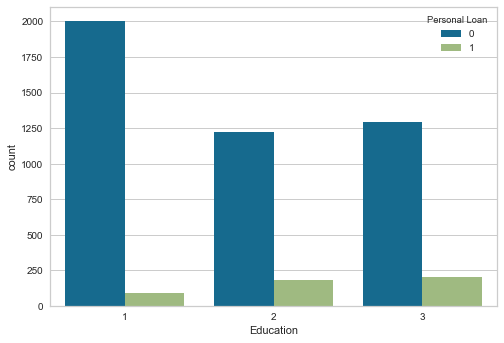

In [216]:
sns.countplot(originalData['Education'], hue=originalData['Personal Loan']);

In [217]:
pd.crosstab(originalData["Education"], originalData["Personal Loan"],  normalize='index')

Personal Loan,0,1
Education,,
1,0.96,0.04
2,0.87,0.13
3,0.86,0.14


Education might have some effect upon loan taking. Education level 1 seems to be less likely to take loans than other education levels.

### Mortgage vs Loan Taking

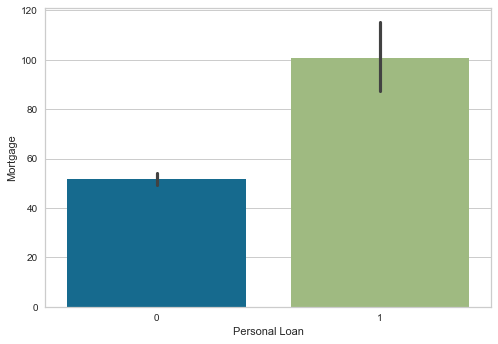

In [218]:
sns.barplot(originalData['Personal Loan'], originalData['Mortgage']);

Customers who took loans appear to have higher mortgage sizes than other customers.

### Securities account vs loan taking

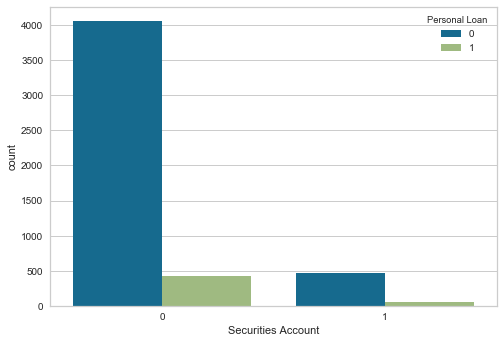

In [219]:
sns.countplot(originalData['Securities Account'], hue=originalData['Personal Loan']);

In [220]:
pd.crosstab(originalData["Securities Account"], originalData["Personal Loan"],  normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.91,0.09
1,0.89,0.11


Having a securities account doesn't appear to have any effect upon Loan taking.

## CD Account vs Loan Taking

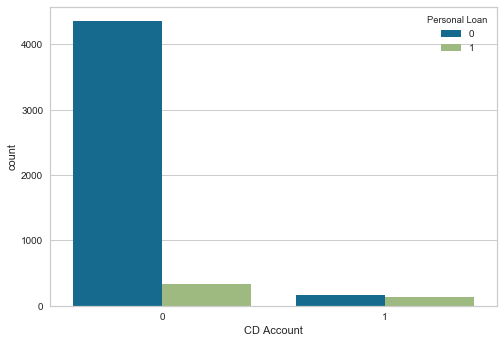

In [221]:
sns.countplot(originalData['CD Account'], hue=originalData['Personal Loan']);

In [222]:
pd.crosstab(originalData["CD Account"], originalData["Personal Loan"],  normalize='index')

Personal Loan,0,1
CD Account,,
0,0.93,0.07
1,0.54,0.46


Customers with a CD Account appear more likely to take loan that customers who don't

## Online

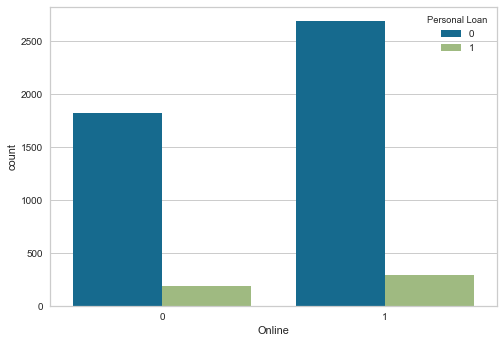

In [223]:
sns.countplot(originalData['Online'], hue=originalData['Personal Loan']);

In [224]:
pd.crosstab(originalData["Online"], originalData["Personal Loan"],  normalize='index')

Personal Loan,0,1
Online,,
0,0.91,0.09
1,0.90,0.10


Having an online account does not not appear to impact loan taking.

### Credit Card

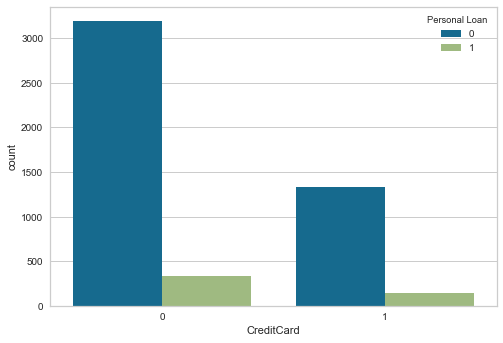

In [225]:
sns.countplot(originalData['CreditCard'], hue=originalData['Personal Loan']);

In [226]:
pd.crosstab(originalData["CreditCard"], originalData["Personal Loan"],  normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.90,0.10
1,0.90,0.10


Having a credit card does not appear to affect id customers get a loan

## EDA Questions

The following questions were set:

Number of unique values in each column?
* this has been answered in each column analysis above

Number of people with zero mortgage
* this has been answered in the analysis of the mortgage column

Number of people with Zero Credit card spending per month?
* This was answered in the analysis of the mortgage column 

Value counts of all Categorical Columns
* this has been answered in each of the column analysis above

Univariate and Bivariate Analysis
* A section called univariate analysis and bi variate analysis has been included


## Get the data model ready

Before doing the regression we need to determine what the target variable is as well as which explanatory variables will be included.

### Target Variable
The Target variable is the categorical variable "Personal Loan". This means we will use a logisitic regression.

In [242]:
Y = originalData["Personal Loan"].astype('category')
Y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: category
Categories (2, int64): [0, 1]

### Exclude from the model
The vaiable "ID" is an identifier that adds nothing to the model. This will be dropped from the model.

Remove the target variable "Personal Loan" from the Explanatory variable dataframe, this avoid "PerfectSeparationError: Perfect separation detected"!

In [243]:
X = originalData.drop("ID", axis=1)
X.drop("Personal Loan", axis=1, inplace=True)
X

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.90,3,0,0,0,1,0
4996,30,4,15,92037,4,0.40,1,85,0,0,1,0
4997,63,39,24,93023,2,0.30,3,0,0,0,0,0
4998,65,40,49,90034,3,0.50,2,0,0,0,1,0


I am dropping the variable 'ZIP Code' because:

* It is nominal data.
* Nominal data is not meaningful in Logistic Regressions
* "one hot encoding" can be used to make nominal data meaningful in logistic regression
* In this case one hot encoding means we will add 467 extra explanatory variables to the model which only has 14 explanatory variables.
* running statsmodels logit.fit() on the one hot encoded explanatory matrix with 467 ZIP Code columns results in a "LinAlgError: Singular matrix" error that prevents the question from being answered

I am forced to drop the column "ZIP Code" from the explanatory variables matrix.

In [244]:
X.drop("ZIP Code", axis=1, inplace=True)
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.60,1,0,1,0,0,0
1,45,19,34,3,1.50,1,0,1,0,0,0
2,39,15,11,1,1.00,1,0,0,0,0,0
3,35,9,100,1,2.70,2,0,0,0,0,0
4,35,8,45,4,1.00,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.90,3,0,0,0,1,0
4996,30,4,15,4,0.40,1,85,0,0,1,0
4997,63,39,24,2,0.30,3,0,0,0,0,0
4998,65,40,49,3,0.50,2,0,0,0,1,0


### Inputing Errors correction
The variable "Experience" contains incorrectly input negative values (discussed above). This values will be replaced with the Mode vale for the experience column.

In [245]:
pd.set_option('display.max_rows', 20)
X[X["Experience"] < 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4411,23,-2,75,2,1.80,2,0,0,0,1,1
4481,25,-2,35,4,1.00,3,0,0,0,1,0
4514,24,-3,41,4,1.00,3,0,0,0,1,0
4582,25,-1,69,3,0.30,3,0,0,0,1,0


In [246]:
mode = X["Experience"].mode()
mode[0]

32

In [247]:
X.loc[X["Experience"] < 0, "Experience"] = mode[0]
X[X["Experience"] < 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard


All customers with a negative number of years of "Exprience" have had the mode value put in instead

In [248]:
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.60,1,0,1,0,0,0
1,45,19,34,3,1.50,1,0,1,0,0,0
2,39,15,11,1,1.00,1,0,0,0,0,0
3,35,9,100,1,2.70,2,0,0,0,0,0
4,35,8,45,4,1.00,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.90,3,0,0,0,1,0
4996,30,4,15,4,0.40,1,85,0,0,1,0
4997,63,39,24,2,0.30,3,0,0,0,0,0
4998,65,40,49,3,0.50,2,0,0,0,1,0


### Scale data

Getting a logisitcs regression to converge to a solution is easier when all variables are scaled appropriately.

I was recieving "convergence warnings" when doing the logistic regression. As a decades old programmer I treat "all warnings as errors" and fix them immediately.

I will use log scaling on Income and Age Columns

I will use scipy z-score on the Experience column which contains zero values.

In [249]:
from scipy import stats

In [250]:
X["Income"] = np.log(X["Income"])

In [251]:
X["Age"] = np.log(X["Age"])

In [252]:
X["Experience"] = stats.zscore(X["Experience"])
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,3.22,-1.72,3.89,4,1.60,1,0,1,0,0,0
1,3.81,-0.13,3.53,3,1.50,1,0,1,0,0,0
2,3.66,-0.48,2.40,1,1.00,1,0,0,0,0,0
3,3.56,-1.01,4.61,1,2.70,2,0,0,0,0,0
4,3.56,-1.10,3.81,4,1.00,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,3.37,-1.54,3.69,1,1.90,3,0,0,0,1,0
4996,3.40,-1.45,2.71,4,0.40,1,85,0,0,1,0
4997,4.14,1.64,3.18,2,0.30,3,0,0,0,0,0
4998,4.17,1.73,3.89,3,0.50,2,0,0,0,1,0


## One Hot encoding of Education types

Currently the Education column is label encoded and has 3 possible values. 

These should be changed to one hot encoding for the prposes of creaing a Logistics Regression Model

In [253]:
X["Education"] = X["Education"].map({1 : "Undergrad", 2 : "Graduate", 3 : "AdvancedProfessional"})
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,3.22,-1.72,3.89,4,1.60,Undergrad,0,1,0,0,0
1,3.81,-0.13,3.53,3,1.50,Undergrad,0,1,0,0,0
2,3.66,-0.48,2.40,1,1.00,Undergrad,0,0,0,0,0
3,3.56,-1.01,4.61,1,2.70,Graduate,0,0,0,0,0
4,3.56,-1.10,3.81,4,1.00,Graduate,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,3.37,-1.54,3.69,1,1.90,AdvancedProfessional,0,0,0,1,0
4996,3.40,-1.45,2.71,4,0.40,Undergrad,85,0,0,1,0
4997,4.14,1.64,3.18,2,0.30,AdvancedProfessional,0,0,0,0,0
4998,4.17,1.73,3.89,3,0.50,Graduate,0,0,0,1,0


In [254]:
X = pd.get_dummies(X ,columns=["Education"])
X

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_AdvancedProfessional,Education_Graduate,Education_Undergrad
0,3.22,-1.72,3.89,4,1.60,0,1,0,0,0,0,0,1
1,3.81,-0.13,3.53,3,1.50,0,1,0,0,0,0,0,1
2,3.66,-0.48,2.40,1,1.00,0,0,0,0,0,0,0,1
3,3.56,-1.01,4.61,1,2.70,0,0,0,0,0,0,1,0
4,3.56,-1.10,3.81,4,1.00,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.37,-1.54,3.69,1,1.90,0,0,0,1,0,1,0,0
4996,3.40,-1.45,2.71,4,0.40,85,0,0,1,0,0,0,1
4997,4.14,1.64,3.18,2,0.30,0,0,0,0,0,1,0,0
4998,4.17,1.73,3.89,3,0.50,0,0,0,1,0,0,1,0


Remove one of the Education One Hot Encoded Fields. 

When we did bi-variate analysis earlier we noticed that under graduates appeared to be taking loans at half the rate of the other two categories.

I will therefore remove that "Education_Undergrad" from the explanatory variable dataframe as it should show bigger differences with the other two.

In [255]:
X.drop("Education_Undergrad", axis=1, inplace=True)
X

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_AdvancedProfessional,Education_Graduate
0,3.22,-1.72,3.89,4,1.60,0,1,0,0,0,0,0
1,3.81,-0.13,3.53,3,1.50,0,1,0,0,0,0,0
2,3.66,-0.48,2.40,1,1.00,0,0,0,0,0,0,0
3,3.56,-1.01,4.61,1,2.70,0,0,0,0,0,0,1
4,3.56,-1.10,3.81,4,1.00,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.37,-1.54,3.69,1,1.90,0,0,0,1,0,1,0
4996,3.40,-1.45,2.71,4,0.40,85,0,0,1,0,0,0
4997,4.14,1.64,3.18,2,0.30,0,0,0,0,0,1,0
4998,4.17,1.73,3.89,3,0.50,0,0,0,1,0,0,1


#### Family Column

This is ordinal data so it can remain as label encoded


This completes the preperation of the data model

## Split Data into Training Sets

Load the required libraries

In [256]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Do the split

In [257]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 88 )

In [258]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(originalData.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(originalData.index)) * 100))

70.00% data is in training set
30.00% data is in test set


The training set 3500 records. The test set is 1500 records as required

In [259]:
X_train

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_AdvancedProfessional,Education_Graduate
1499,3.95,0.49,4.51,1,4.30,0,0,1,1,1,0,1
841,4.04,1.11,4.80,1,4.30,0,1,0,0,0,0,0
3730,3.40,-1.28,4.72,3,2.50,0,0,0,1,0,0,0
1718,3.69,-0.39,2.94,4,0.40,0,0,0,1,1,0,1
3735,3.69,-0.57,4.36,1,5.20,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4709,3.26,-1.72,3.56,2,1.70,119,0,0,0,1,0,1
362,4.06,1.02,4.73,2,1.40,270,0,0,0,1,0,0
2481,4.01,0.84,4.16,2,1.90,0,0,0,0,0,0,1
4047,3.76,-0.31,4.41,1,5.20,79,0,0,1,0,0,0


## Use Logistic Regression

### Model Analysis using statsmodels.api

In [260]:
import statsmodels.api as sm
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.100269
         Iterations 10


In [261]:
lg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                    Logit                  Pseudo R-squared:       0.682   
Dependent Variable:       Personal Loan          AIC:                    727.8849
Date:                     2020-07-07 19:47       BIC:                    807.9716
No. Observations:         3500                   Log-Likelihood:         -350.94 
Df Model:                 12                     LL-Null:                -1104.5 
Df Residuals:             3487                   LLR p-value:            0.0000  
Converged:                1.0000                 Scale:                  1.0000  
No. Iterations:           10.0000                                                
---------------------------------------------------------------------------------
                                Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------------
const                          -48.3637   5.6837 -8.5092 0.0000 -59.5035 -37.2238
Age                              1.1065   1.2786  0.8654 0.3868  -1.3995   3.6125
Experience                      -0.2085   0.3339 -0.6243 0.5324  -0.8630   0.4460
Income                           8.0181   0.5163 15.5296 0.0000   7.0062   9.0301
Family                           0.6855   0.0990  6.9248 0.0000   0.4915   0.8796
CCAvg                            0.1316   0.0529  2.4885 0.0128   0.0279   0.2352
Mortgage                         0.0008   0.0007  1.1502 0.2501  -0.0006   0.0023
Securities Account              -1.2281   0.4014 -3.0598 0.0022  -2.0148  -0.4415
CD Account                       4.3237   0.4498  9.6123 0.0000   3.4421   5.2053
Online                          -0.6676   0.2115 -3.1568 0.0016  -1.0821  -0.2531
CreditCard                      -1.2111   0.2836 -4.2706 0.0000  -1.7669  -0.6553
Education_AdvancedProfessional   4.3831   0.3347 13.0961 0.0000   3.7271   5.0391
Education_Graduate               4.3513   0.3347 13.0012 0.0000   3.6953   5.0073
=================================================================================

"""

The above analysis shows that the most significant terms in the logistic regression are:

* Constant
* Income
* Family 
* Credit Card Average
* Securities Account
* CD Account
* Online Account
* Credit Card
* Education status "Advanced / Professional"
* Education Status "Graduate"

In [262]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.6823
Time:                        19:47:56   Log-Likelihood:                -350.94
converged:                       True   LL-Null:                       -1104.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -48.3637      5.684     -8.509      0.000     -59.503     -37.224
Age                                1.1065      1.279      0.865      0.

The regression has an R-Squared of 0.6823. This isn't awful but room for improvment exists

The quasi-seperation warning is of concern. It appear a single varaible (most likely income) accounts for most of the variablility

In [263]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [264]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Income,8.02,3035.46,1.00,0.00
Education_AdvancedProfessional,4.38,80.09,0.99,0.00
Education_Graduate,4.35,77.58,0.99,0.00
CD Account,4.32,75.47,0.99,0.00
Family,0.69,1.98,0.66,0.00
CCAvg,0.13,1.14,0.53,0.01
Online,-0.67,0.51,0.34,0.00
CreditCard,-1.21,0.30,0.23,0.00
Securities Account,-1.23,0.29,0.23,0.00
const,-48.36,0.00,0.00,0.00


Income is the single biggest predictor of loan taking. With an odds of 3035.46 This dwarfs any other explanatory factor.

Education states of "Graduate" and "Advanced Professional" as well as "CD Account" are 70 + times more likely to borrow money than "Undergraduates".

The main explanatory variables are "Income", "Education_AdvancedProfessional","Education_Graduate" and "CD Account"

### Model Predictions and building with SKLearn

In [265]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

# 1000 interations to allow convergence
logreg = LogisticRegression(random_state=77, solver="saga", max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=77, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [266]:
y_predict = logreg.predict(X_test)    

In [267]:
y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test

y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ) )
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## Therefore thershold here is 0.7 as values at and above 0.7 probability is converted to '1'

y_pred_df.head()

,actual,predicted_prob,predicted
3452,0,0.00,0
3116,0,0.00,0
585,0,0.15,0
822,0,0.01,0
1398,0,0.03,0


In [268]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No loan", "loan"] , yticklabels = ["No loan", "loan"] )
    plt.ylabel('Predicted Loan Outcome')
    plt.xlabel('Actual Loan Outcome')
    plt.show()

#### Confusion Matrix

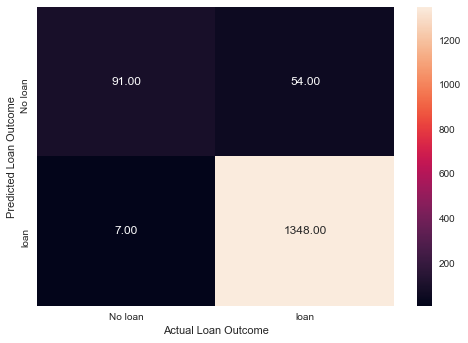

In [269]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [270]:
print("Training accuracy",logreg.score(X_train,y_train))  
print("Testing accuracy",logreg.score(X_test, y_test))
print("Recall:",recall_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Training accuracy 0.9022857142857142
Testing accuracy 0.9053333333333333
Recall: 0.10344827586206896
Precision: 0.5555555555555556
F1 Score: 0.1744186046511628
Roc Auc Score: 0.5472960936505917


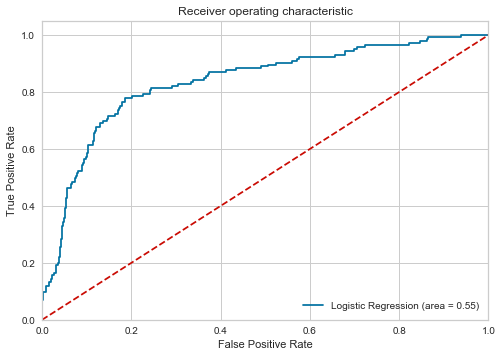

In [271]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Make Model better

**Checking Parameters of Logistic Regression**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

If we dont specify the parameters in the model it takes default value

In [272]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 77,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [273]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=77,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print(train_score)
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
[0.963, 0.953, 0.951, 0.903, 0.904]
[0.959, 0.946, 0.949, 0.905, 0.903]


In all cases the test and training scores are very close to each other.In all cases the test score and the training score is the same to 2 decimal places.

"newton-cg", "lbfgs", "lbllinear" and "saga" are all slightly "overfit". Only "sag" has slightly better +0.002 better test scores than training scores.

As all results are so close in terms of "fitting" I will choose the method that gives the best fit for the test data. In this case that is "newton-cg" with 0.959.

In [274]:
penalities = ["l2","none"]
solver = ["newton-cg"]

for p in penalities:
    print("Penalty type : ",p)
    print()
    for s in solver:
        print("solver : ", s)
        model = LogisticRegression(random_state=88,penalty=p,solver=s,class_weight='balanced')
        model.fit(X_train, y_train) 
        y_predict = model.predict(X_test)     
        print("Training accuracy",model.score(X_train,y_train))  
        print("Testing accuracy",model.score(X_test, y_test))
        print()


Penalty type :  l2

solver :  newton-cg
Training accuracy 0.9054285714285715
Testing accuracy 0.908

Penalty type :  none

solver :  newton-cg
Training accuracy 0.9074285714285715
Testing accuracy 0.9113333333333333



In both cases the test performance is better than the training performance. I will choose the penalty type that gives better accuracy. In this case I will use "none" with the accuracy 0.911.

In [275]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
cutoff = [0.01,0.1,0.25,0.5,0.75,1]
for i in cutoff:
    model = LogisticRegression(random_state=88,solver='newton-cg',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop

print("cutoff point : ",cutoff)
print("training score",train_score)
print("test     score",test_score)
print()

cutoff point :  [0.01, 0.1, 0.25, 0.5, 0.75, 1]
training score [0.872, 0.899, 0.902, 0.905, 0.905, 0.905]
test     score [0.883, 0.903, 0.907, 0.907, 0.908, 0.908]



In all cases the test data gives better accuracy than training data.

The highest accuracy of 0.907 is achieved with the values 0.25 and 0.5. I choose the lower value of 0.25 which is better fit.

In [276]:
#Therefore final model is
model = LogisticRegression(random_state=88,solver='newton-cg', class_weight='balanced',C=0.25) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Training accuracy",model.score(X_train,y_train))  
print("Testing accuracy",model.score(X_test, y_test))

Training accuracy 0.9022857142857142
Testing accuracy 0.9073333333333333


Confusion Matrix


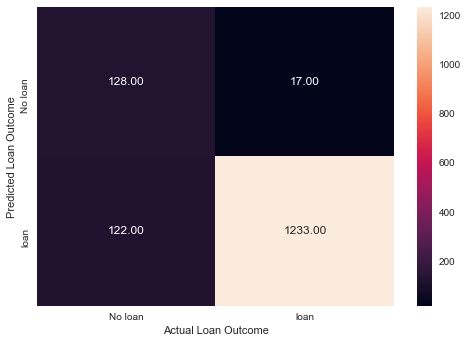

None


In [277]:
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

In [278]:
print("Recall:",recall_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Recall: 0.8827586206896552
Precision: 0.512
F1 Score: 0.6481012658227848
Roc Auc Score: 0.8963608601603258


#### Comment
These results are "better" in 3 of the 4 metics than the model achieved earlier.

* Recall has jumped from 0.103 to 0.882. 
* F1 Score has jumped from 0.174 to 0.648 
* ROC AUC Score has jumped from 0.547 to 0.896

Precison on the other hand has slipped significantly. This has gone from 0.555 to 0.512

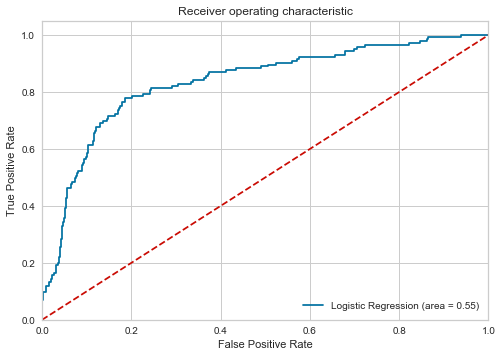

In [279]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

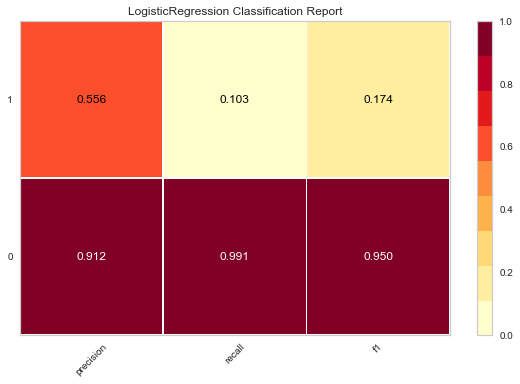

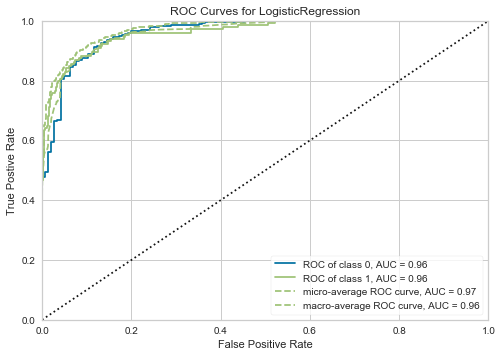

In [280]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(logreg)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Comments

The second model is best so far for the business. 

The purpose of the model is to acurately forecast the number of loans being taken. The second model has the highest recall rate (0.882). This means it will identify the highest number of loans being taken.

The analysis above indicated that 9 factors were significant to the regression model. The current explanatory matrix has 12 explanatory varables. The un-need 3 varaiables should be removed to see if we can futher improve the model.

## Further Exploration

An additional analysis will be carried out to examine the effect of only including the 9 columns deemed as important to the model. The current matrix of explanatory variable looks as thus:

In [119]:
X

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_AdvancedProfessional,Education_Graduate
0,3.22,-1.72,3.89,4,1.60,0,1,0,0,0,0,0
1,3.81,-0.13,3.53,3,1.50,0,1,0,0,0,0,0
2,3.66,-0.48,2.40,1,1.00,0,0,0,0,0,0,0
3,3.56,-1.01,4.61,1,2.70,0,0,0,0,0,0,1
4,3.56,-1.10,3.81,4,1.00,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.37,-1.54,3.69,1,1.90,0,0,0,1,0,1,0
4996,3.40,-1.45,2.71,4,0.40,85,0,0,1,0,0,0
4997,4.14,1.64,3.18,2,0.30,0,0,0,0,0,1,0
4998,4.17,1.73,3.89,3,0.50,0,0,0,1,0,0,1


Currently the model contains a number of terms not deemed as significant in the analysis. Based upon earlier analysis we will now drop the columns "Age", "experience","Mortgage"

In [281]:
X2 = X
X2.drop(["Age","Experience","Mortgage"] ,axis = 1, inplace=True)
X2

,Income,Family,CCAvg,Securities Account,CD Account,Online,CreditCard,Education_AdvancedProfessional,Education_Graduate
0,3.89,4,1.60,1,0,0,0,0,0
1,3.53,3,1.50,1,0,0,0,0,0
2,2.40,1,1.00,0,0,0,0,0,0
3,4.61,1,2.70,0,0,0,0,0,1
4,3.81,4,1.00,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
4995,3.69,1,1.90,0,0,1,0,1,0
4996,2.71,4,0.40,0,0,1,0,0,0
4997,3.18,2,0.30,0,0,0,0,1,0
4998,3.89,3,0.50,0,0,1,0,0,1


In [282]:
X_train, X_test, y_train, y_test = train_test_split( X2, Y, test_size = 0.3, random_state = 88 )

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.100631
         Iterations 10


In [283]:
lg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                     Logit                  Pseudo R-squared:       0.681   
Dependent Variable:        Personal Loan          AIC:                    724.4198
Date:                      2020-07-07 19:52       BIC:                    786.0250
No. Observations:          3500                   Log-Likelihood:         -352.21 
Df Model:                  9                      LL-Null:                -1104.5 
Df Residuals:              3490                   LLR p-value:            0.0000  
Converged:                 1.0000                 Scale:                  1.0000  
No. Iterations:            10.0000                                                
----------------------------------------------------------------------------------
                                Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------------
const                          -44.2156   2.6543 -16.6579 0.0000 -49.4180 -39.0132
Income                           8.0529   0.5136  15.6780 0.0000   7.0461   9.0596
Family                           0.6816   0.0987   6.9081 0.0000   0.4883   0.8750
CCAvg                            0.1210   0.0523   2.3111 0.0208   0.0184   0.2236
Securities Account              -1.2280   0.4005  -3.0662 0.0022  -2.0129  -0.4430
CD Account                       4.3705   0.4494   9.7247 0.0000   3.4896   5.2513
Online                          -0.6675   0.2112  -3.1600 0.0016  -1.0815  -0.2535
CreditCard                      -1.2444   0.2816  -4.4184 0.0000  -1.7964  -0.6924
Education_AdvancedProfessional   4.3369   0.3308  13.1118 0.0000   3.6886   4.9852
Education_Graduate               4.3217   0.3319  13.0220 0.0000   3.6712   4.9721
==================================================================================

"""

In [284]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.6811
Time:                        19:52:42   Log-Likelihood:                -352.21
converged:                       True   LL-Null:                       -1104.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -44.2156      2.654    -16.658      0.000     -49.418     -39.013
Income                             8.0529      0.514     15.678      0.

In this final model the Adjusted R squared has increased slightly to 0.6811

Redo Logistic calculation.

In [288]:
# 1000 interations to allow convergence
logreg = LogisticRegression(random_state=88, max_iter =1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=88, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [289]:
y_predict = logreg.predict(X_test)

y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test

y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ) )
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## Therefore thershold here is 0.7 as values at and above 0.7 probability is converted to '1'

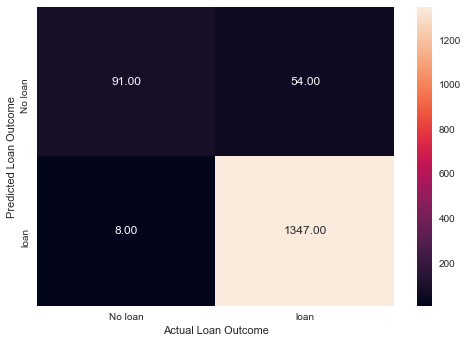

In [287]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [290]:
print("Training accuracy",logreg.score(X_train,y_train))  
print("Testing accuracy",logreg.score(X_test, y_test))
print("Recall:",recall_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Training accuracy 0.9648571428571429
Testing accuracy 0.9593333333333334
Recall: 0.6482758620689655
Precision: 0.9038461538461539
F1 Score: 0.7550200803212852
Roc Auc Score: 0.8204478941341137


The recall score here is 0.684, above the very first model(0.103), but below the current best recall score of 0.879

Tune this final model:

In [291]:
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=88,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print(train_score)
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
[0.964, 0.964, 0.946, 0.963, 0.958]
[0.959, 0.959, 0.939, 0.959, 0.953]


Again, to 2 decimal places most of the test and the training scores are the same. 

In this case 3 types of solvers have the same accuracy score of 0.959. These are "newton-cg","lbfgs" and "sag".

Of these 3 the train data is least overfit on "sag" so I choose "sag"

In [292]:
penalities = ["l2","none"]
solver = ["sag"]
for p in penalities:
    print("Penalty type : ",p)
    print()
    for s in solver:
        print("solver : ", s)
        model = LogisticRegression(random_state=77,penalty=p,solver=s,class_weight='balanced',max_iter=1000)
        model.fit(X_train, y_train) 
        y_predict = model.predict(X_test)     
        print("Training accuracy",model.score(X_train,y_train))  
        print("Testing accuracy",model.score(X_test, y_test))
        print()

Penalty type :  l2

solver :  sag
Training accuracy 0.9034285714285715
Testing accuracy 0.9106666666666666

Penalty type :  none

solver :  sag
Training accuracy 0.906
Testing accuracy 0.9106666666666666



Both have the same testing accuracy and neithe ris overfit. Penalty type "l2" has a lower traing accuracy so I use l2.

In [293]:
train_score=[]                                 
test_score=[]
cutoff = [0.01,0.1,0.25,0.5,0.75,1]
for i in cutoff:
    model = LogisticRegression(random_state=88,solver='liblinear',penalty="l2", class_weight='balanced', C=i,max_iter=1000)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop

print("cutoff point : ",cutoff)
print("training score",train_score)
print("test     score",test_score)
print()

cutoff point :  [0.01, 0.1, 0.25, 0.5, 0.75, 1]
training score [0.809, 0.863, 0.876, 0.884, 0.888, 0.893]
test     score [0.796, 0.863, 0.879, 0.888, 0.891, 0.891]



Again to 2 decmial places the results are mostly the same so I choose 0.891 which is the highest possible accuracy. This forst occurs at cutoff 0.75

In [294]:
#Therefore final model is
model = LogisticRegression(random_state=88,solver='liblinear', penalty="l2", class_weight='balanced',C=0.75,max_iter=1000) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Training accuracy",model.score(X_train,y_train))  
print("Testing accuracy",model.score(X_test, y_test))

Training accuracy 0.8882857142857142
Testing accuracy 0.8913333333333333


Confusion Matrix


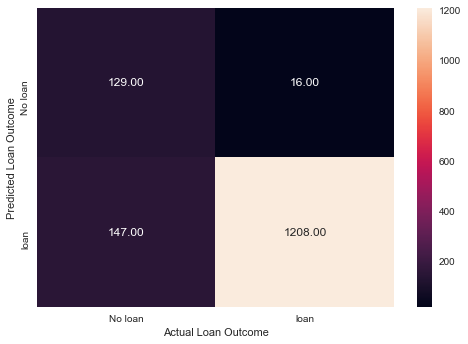

None


In [295]:
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

In [296]:
print("Recall:",recall_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Recall: 0.8896551724137931
Precision: 0.4673913043478261
F1 Score: 0.6128266033254156
Roc Auc Score: 0.8905840437714723


### Result

Recall is now 0.890. This is the highest yet achieved.

## Explain to the business

The purpose of the model is to acurately forecast the number of loans being taken. Ths means we want to as accurately as possible identify how many loans will be taken.

The correct metric to do this is the recall rate. We have achieved a recall rate of 89.0%. This is a good model.

The model is built using 9 variables. These are:
* Income
* Education Status
* Family Size
* Average Credit Card payments
* Securities Account Owner
* CD Acount Owner
* Online Account Holder
* Credit Card Holder

The model is ready to be built to allow the business to accurately forecast how many loans will be taken.

It might be possible to improve the recall rate further by looking to se eif futher terms can be removed from the model. But this activity lies beyond the scope of this current project!